In [5]:
from impact_score.model.lgbm_model import ValorantLGBM, get_trained_model_from_csv
from impact_score.model.model_improvement.shap_query import query_shap_situation, raw_shap_situation
import lightgbm

from pathlib import Path
import os
import pandas as pd
import shap

vm = get_trained_model_from_csv()
# vm = ValorantLGBM()
# vm.setup_dataframe("4000.csv")
# vm.train_model(optuna_study=False)
model: lightgbm.LGBMClassifier = vm.model
features = model.feature_name_

def get_dataset_reference():
    model_improvement_folder = Path(os.getcwd())
    model_folder = model_improvement_folder.parent
    impact_score_folder = model_folder.parent
    return Path(impact_score_folder, "datasets")

filename = "100.csv"
df = pd.read_csv(f"{get_dataset_reference()}\\{filename}")

sit = raw_shap_situation(match_id=78746, round_number=12, event_index=7)
df = df.append(sit)
df = df.iloc[-5:]

In [6]:
df.query('Team_A_ID == 184').query('Team_B_ID == 738')

,RegularTime,SpikeTime,MapName,FinalWinner,RoundID,MatchID,RoundNumber,RoundTime,ATK_loadoutValue,ATK_weaponValue,...,Controller_loadout_diff,Duelist_loadout_diff,Loadout_diff,MapName_Ascent,MapName_Bind,MapName_Breeze,MapName_Fracture,MapName_Haven,MapName_Icebox,MapName_Split
114,0,30,Bind,0,1226868,78746,12,46597,10850,7400,...,4650,2400,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
x = df[features]
y = df["FinalWinner"]

In [8]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(x)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


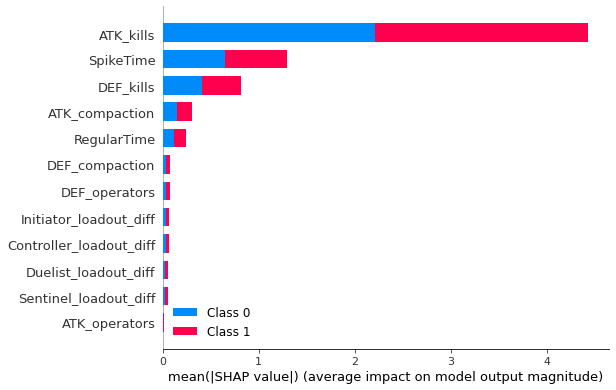

In [9]:
shap.summary_plot(shap_values, x)

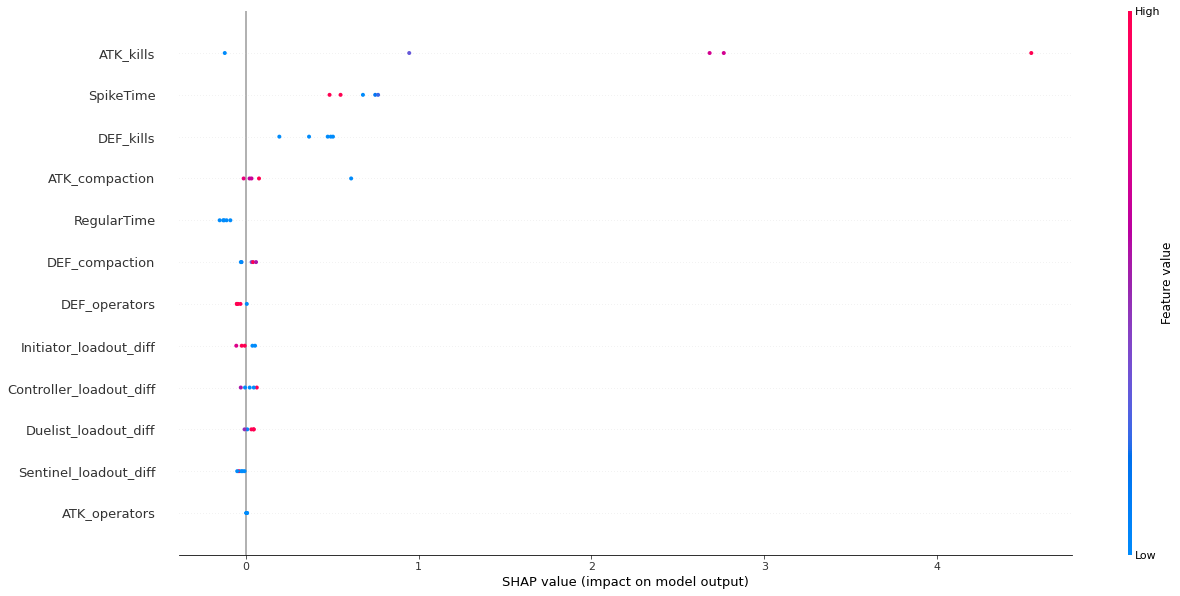

In [10]:
shap.summary_plot(shap_values[1], x, plot_size=(20,10))

In [11]:
df.iloc[-1]

RegularTime                         0
SpikeTime                          30
MapName                          Bind
FinalWinner                         0
RoundID                       1226868
MatchID                         78746
RoundNumber                        12
RoundTime                       46597
ATK_loadoutValue                10850
ATK_weaponValue                  7400
ATK_shields                       100
ATK_remainingCreds                500
ATK_operators                       0
ATK_kills                           4
ATK_Initiator                    3800
ATK_Duelist                      2400
ATK_Sentinel                        0
ATK_Controller                   4650
ATK_compaction             110.051509
DEF_loadoutValue                 4850
DEF_weaponValue                  2900
DEF_shields                        50
DEF_remainingCreds               2350
DEF_operators                       0
DEF_kills                           2
DEF_Initiator                    4850
DEF_Duelist 

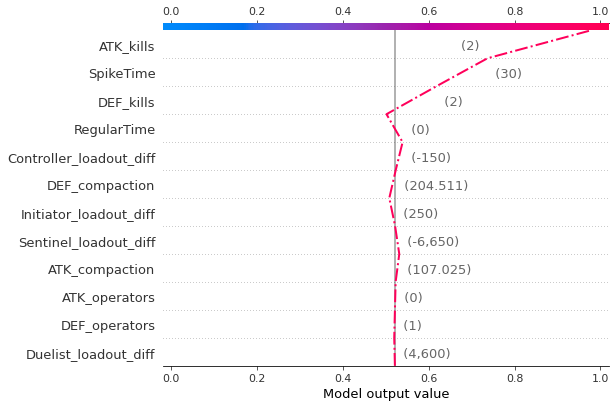

In [28]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][4], x, link="logit", highlight=0)

In [ ]:
shap.dependence_plot("Loadout_diff", shap_values[0], x)

In [ ]:
shap.dependence_plot("DEF_operators", shap_values[0], x)

In [ ]:
shap.dependence_plot("DEF_compaction", shap_values[0], x)

In [ ]:
shap.dependence_plot("atkCompaction", shap_values[0], x)

In [ ]:
shap.dependence_plot("SpikeTime", shap_values[0], x)

In [ ]:
shap.dependence_plot("RegularTime", shap_values[0], x)

In [ ]:
shap.dependence_plot("ATK_Sentinel", shap_values[0], x)

In [ ]:
x.iloc[450]

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][449], x, link="logit", highlight=0)

In [ ]:
shap.initjs()
columIndex= 29
shap.force_plot(explainer.expected_value[1], shap_values[1][columIndex,:], x.iloc[columIndex,:], link="logit")

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[0][:20], x)